In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')


from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [4]:
chardatajeju_df = pd.read_excel('제주21년1월부터12월이상치+주소정리.xlsx')
chardatajeju_df

,Unnamed: 0,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,24,제주,서귀포,삼정지에듀,완속02,3646,"제주특별자치도 서귀포시 대정읍 에듀시티로 148 (보성리, 삼정 G.edu)",완속,7.0,42.55,6,38,2021-01-01,2021-01-01 16:01:42,2021-01-01 22:40:05,제주특별자치도,서귀포시,"대정읍 에듀시티로 148 (보성리, 삼정 G.edu)"
1,29,제주,제주직할,삼양2동 공영주차장,급속01,8061,제주특별자치도 제주시 삼양2동 2176-13,급속,50.0,45.03,1,21,2021-01-01,2021-01-01 22:30:09,2021-01-01 23:51:43,제주특별자치도,제주시,삼양2동 2176-13
2,33,제주,제주직할,LH제주본부,급속01,1431,제주특별자치도 제주시 삼도1동 305-4,급속,50.0,63.61,2,24,2021-01-01,2021-01-01 20:19:25,2021-01-01 22:43:25,제주특별자치도,제주시,삼도1동 305-4
3,35,제주,서귀포,삼아 아파트,완속02,5241,제주특별자치도 서귀포시 동홍동 태평로 536,완속,7.0,7.80,1,29,2021-01-01,2021-01-01 21:14:36,2021-01-01 22:43:37,제주특별자치도,서귀포시,동홍동 태평로 536
4,41,제주,제주직할,아라인빌,완속01,7685,제주특별자치도 제주시 제주대학로 64-29,완속,7.0,14.80,4,37,2021-01-01,2021-01-01 17:55:45,2021-01-01 22:33:40,제주특별자치도,제주시,제주대학로 64-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181584,2097129,제주,제주직할,노형아이파크,완속02,3519,제주특별자치도 제주시 노형동 원노형로 90,완속,7.0,18.90,3,7,2021-10-17,2021-10-16 22:08:32,2021-10-17 01:15:58,제주특별자치도,제주시,노형동 원노형로 90
181585,2097135,제주,서귀포,중문메리디안,완속02,5849,제주특별자치도 서귀포시 중문동 1100로 36,완속,7.0,26.79,4,31,2021-10-17,2021-10-16 21:35:11,2021-10-17 02:06:26,제주특별자치도,서귀포시,중문동 1100로 36
181586,2097137,제주,제주직할,노형지구중흥S클래스 아파트,완속02,3522,제주특별자치도 제주시 노형동 광평동로 66,완속,7.0,32.33,5,54,2021-10-17,2021-10-16 21:05:09,2021-10-17 03:00:06,제주특별자치도,제주시,노형동 광평동로 66
181587,2097143,제주,제주직할,제주으뜸마을LH 아파트,급속01,3610,제주특별자치도 제주시 노형동 진군1길 3,급속,50.0,16.88,0,29,2021-10-17,2021-10-17 12:22:40,2021-10-17 12:51:44,제주특별자치도,제주시,노형동 진군1길 3


In [5]:
chardatajeju21_df = chardatajeju_df.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [6]:
chardatajeju21_df = chardatajeju21_df.drop_duplicates()
chardatajeju21_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
0,제주,서귀포,삼정지에듀,완속02,"제주특별자치도 서귀포시 대정읍 에듀시티로 148 (보성리, 삼정 G.edu)",완속,7.0,서귀포시
1,제주,제주직할,삼양2동 공영주차장,급속01,제주특별자치도 제주시 삼양2동 2176-13,급속,50.0,제주시
2,제주,제주직할,LH제주본부,급속01,제주특별자치도 제주시 삼도1동 305-4,급속,50.0,제주시
3,제주,서귀포,삼아 아파트,완속02,제주특별자치도 서귀포시 동홍동 태평로 536,완속,7.0,서귀포시
4,제주,제주직할,아라인빌,완속01,제주특별자치도 제주시 제주대학로 64-29,완속,7.0,제주시
...,...,...,...,...,...,...,...,...
175082,환경부,환경부,한국산업인력공단 제주지사,급속01,제주특별자치도 제주시 복지로 19,급속,NaN,제주시
175130,환경부,환경부,대정감협 인근 공영주차장,급속01,제주특별자치도 서귀포시 대정읍 하모리 964-2,급속,NaN,서귀포시
175276,환경부,환경부,제주농업기술센터,급속02,제주특별자치도 제주시 애월읍 상귀길 173,급속,NaN,제주시
177353,환경부,환경부,서귀포보건소,급속01,제주특별자치도 서귀포시 중앙로 101번길 52,급속,NaN,서귀포시


In [7]:
print(chardatajeju21_df['구'].value_counts())

제주시     477
서귀포시    191
Name: 구, dtype: int64


In [8]:
chardatajeju21_df['구'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         서귀포시
1          제주시
2          제주시
3         서귀포시
4          제주시
          ... 
175082     제주시
175130    서귀포시
175276     제주시
177353    서귀포시
179692     제주시
Name: 구, Length: 668, dtype: object>

In [18]:
# 2021년 제주도 구별 충전소 가동률
np.round(chardatajeju21_df['구'].value_counts().div(668),2)

제주시     0.71
서귀포시    0.29
Name: 구, dtype: float64

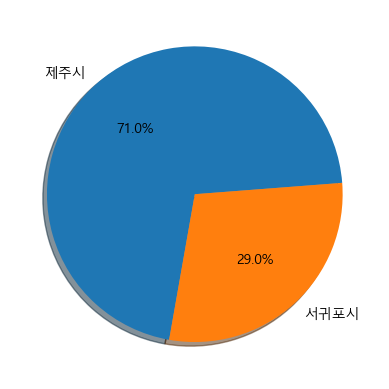

In [19]:
# 2021년 전기차 충전소 가동비율 그래프
ratio = [71,29]
labels = ['제주시', '서귀포시']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.show()

In [20]:
# 2021년 제주도 전기차 충전소 급속, 완속 충전기합
print(chardatajeju21_df['충전기구분'].value_counts())

급속    446
완속    222
Name: 충전기구분, dtype: int64


<Axes: >

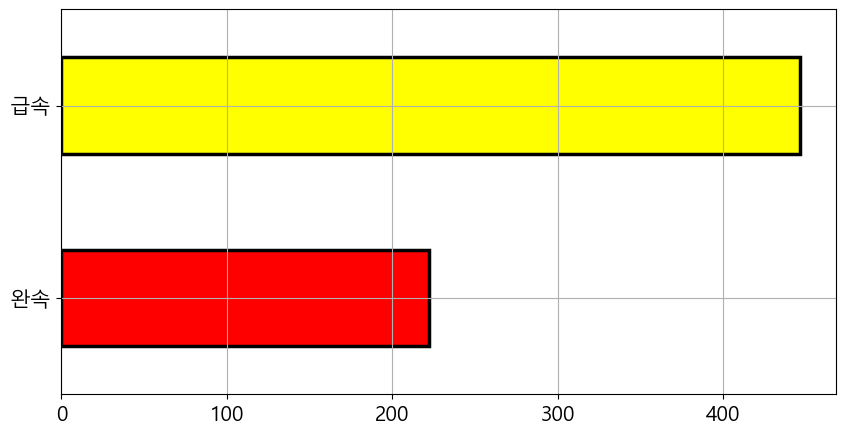

In [21]:
# 21년도 충전기 대수 가동 현황 총합 (완속, 급속)

chargerjeju20dist = pd.value_counts(chardatajeju21_df['충전기구분'].values, sort=True, ascending = True)
chargerjeju20dist.plot.barh()
chargerjeju20dist.plot.barh(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,5), fontsize=15)

In [22]:
# 2021년도 제주도 자치구별, 충전기구분별 데이터 프레임을 추출합니다.

chargerjeju21_df = chardatajeju21_df[['구', '충전기구분']]
chargerjeju21_df = chargerjeju21_df.groupby(["구", "충전기구분"]).size()
pd.DataFrame(chargerjeju21_df)

0
구    충전기구분     
서귀포시 급속     151
     완속      40
제주시  급속     295
     완속     182

(array([0, 1, 2, 3]),
 [Text(0, 0, '(서귀포시, 급속)'),
  Text(1, 0, '(서귀포시, 완속)'),
  Text(2, 0, '(제주시, 급속)'),
  Text(3, 0, '(제주시, 완속)')])

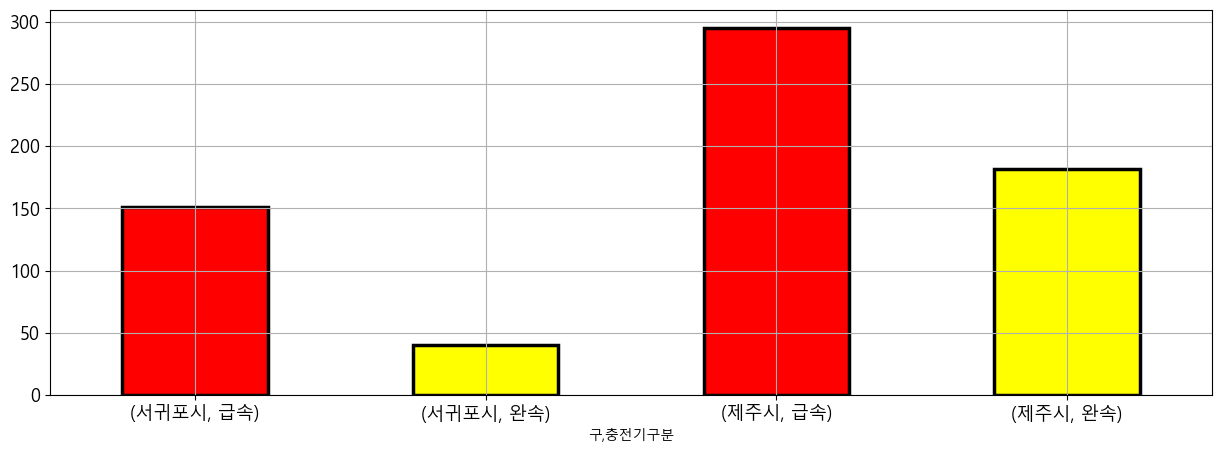

In [23]:
# 2020년도 제주도 자치구별 충전기 가동 현황을  시각화합니다. (구, 급속, 완속)

chargerjeju21_df.plot.bar()
chargerjeju21_df.plot.bar(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(15,5), fontsize=13)
plt.xticks(rotation = 360)

In [29]:
# 2021년도 전기차충전소 사용빈도(제주시/서귀포시)
print(chardatajeju_df['구'].value_counts())

제주시     131162
서귀포시     50427
Name: 구, dtype: int64


<Axes: >

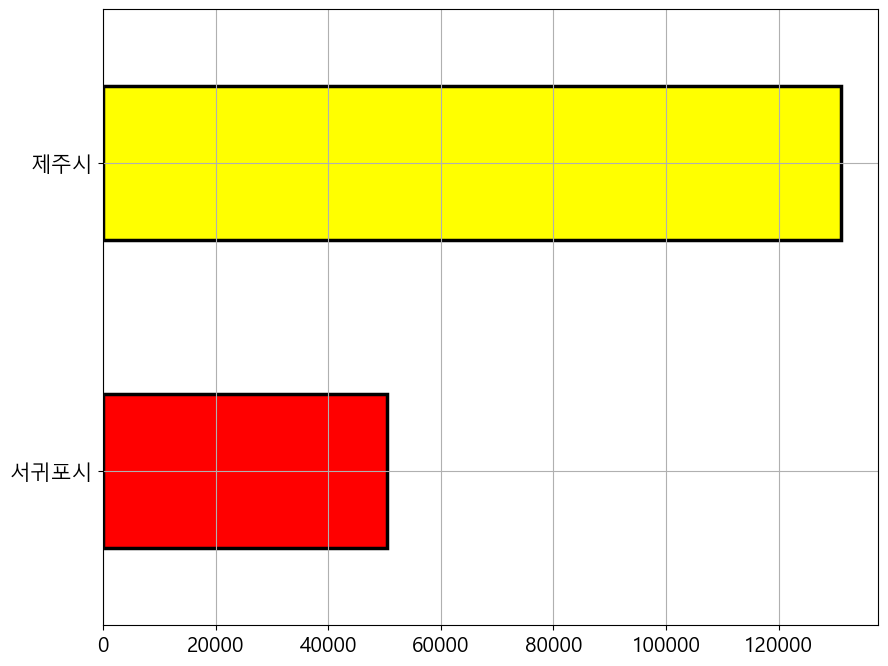

In [33]:
# 2021년도 제주도 전기차 충전소 사용 빈도 시각화

chargecountjeju21_df = pd.value_counts(chardatajeju_df['구'].values, sort=True, ascending = True)
chargecountjeju21_df.plot.barh()
chargecountjeju21_df.plot.barh(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)

In [31]:
# 2021년도 전기차충전소 사용빈도(급속/완속)
print(chardatajeju_df['충전기구분'].value_counts())

급속    131692
완속     49897
Name: 충전기구분, dtype: int64


<Axes: >

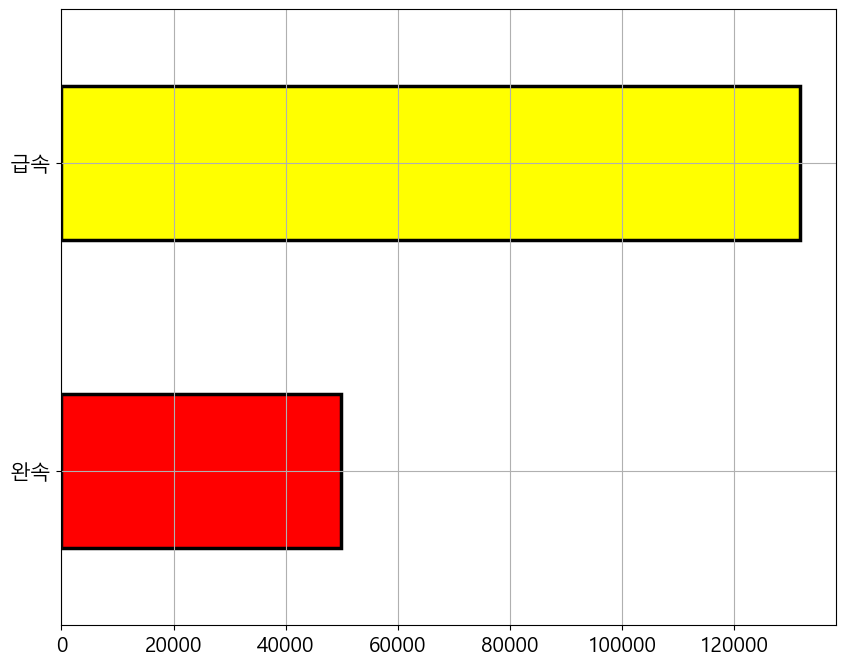

In [34]:
# 2021년도 제주도 전기차 충전소(급속/완속) 사용 빈도 시각화

chargetypecountjeju21_df = pd.value_counts(chardatajeju_df['충전기구분'].values, sort=True, ascending = True)
chargetypecountjeju21_df.plot.barh()
chargetypecountjeju21_df.plot.barh(grid=True, color = ['red', 'yellow'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)